#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
data = requests.get('https://github.com/EliasNote/challenge2-data-science/raw/main/TelecomX_Data.json').json()
df = pd.DataFrame(data)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
# Normalização
df = pd.json_normalize(data)                                                    # Normalizando os dados JSON.
df.head() 

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [4]:
df.columns = [c.split('.', 1)[1] if '.' in c else c for c in df.columns]

In [5]:
# Verificando valores únicos
for c in df.columns:
    print(f'{c}: {df[c].unique()}')

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Cr

In [6]:
# Verificação de dados duplicados
print(df.duplicated().sum())

0


In [7]:
#Verificando se existe campos nulos
df.isnull().sum()

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

In [8]:
# Verificando valores vazios
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].str.strip()

print((df == '').sum())

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total        11
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [10]:
# Transformação de coluna para float
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'].str.strip(), errors='coerce')

# Preenchimento de dados nulos com a média
df['Charges.Total'] = df['Charges.Total'].fillna(df['Charges.Total'].median())

print((df == '').sum())

customerID            0
Churn               224
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Charges.Monthly       0
Charges.Total         0
dtype: int64


In [11]:
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [12]:
colunasbool = ['Churn', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for c in colunasbool:
    df[c] = df[c].str.strip()

df['Churn'] = df['Churn'].replace('', np.nan)
df = df.dropna(subset=['Churn'])

print((df == '').sum())

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


In [13]:
df = df.copy()

# Modificando valores para binário
for c in colunasbool:
    df[c] = df[c].map({'Yes': 1, 'No': 0}).astype(int)

for c in colunasbool:
    print(f'{df.groupby(c).size()}\n')

Churn
0    5174
1    1869
dtype: int64

Partner
0    3641
1    3402
dtype: int64

Dependents
0    4933
1    2110
dtype: int64

PhoneService
0     682
1    6361
dtype: int64

PaperlessBilling
0    2872
1    4171
dtype: int64



In [14]:
# Criando a coluna de contas diárias
df['contas_diarias'] = round(df['Charges.Monthly'] / 30, 2)

In [15]:
# Padronizando nome das colunas
mapa_colunas = {
    'customerID': 'id_cliente',
    'Churn': 'cancelamento',
    'gender': 'genero',
    'SeniorCitizen': 'idoso',
    'Partner': 'possui_parceiro',
    'Dependents': 'possui_dependentes',
    'tenure': 'tempo_contrato_meses',
    'PhoneService': 'servico_telefone',
    'MultipleLines': 'multiplas_linhas',
    'InternetService': 'tipo_internet',
    'OnlineSecurity': 'seguranca_online',
    'OnlineBackup': 'backup_online',
    'DeviceProtection': 'protecao_dispositivo',
    'TechSupport': 'suporte_tecnico',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_filmes',
    'Contract': 'tipo_contrato',
    'PaperlessBilling': 'fatura_digital',
    'PaymentMethod': 'metodo_pagamento',
    'Charges.Monthly': 'valor_mensal',
    'Charges.Total': 'total_cobrado'
}
df = df.rename(columns=mapa_colunas)

#📊 Carga e análise

In [16]:
df.head()

,id_cliente,cancelamento,genero,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,multiplas_linhas,tipo_internet,...,protecao_dispositivo,suporte_tecnico,streaming_tv,streaming_filmes,tipo_contrato,fatura_digital,metodo_pagamento,valor_mensal,total_cobrado,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [17]:
df.describe() 

,cancelamento,idoso,possui_parceiro,possui_dependentes,tempo_contrato_meses,servico_telefone,fatura_digital,valor_mensal,total_cobrado,contas_diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2281.906815,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2265.274362,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,402.225000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


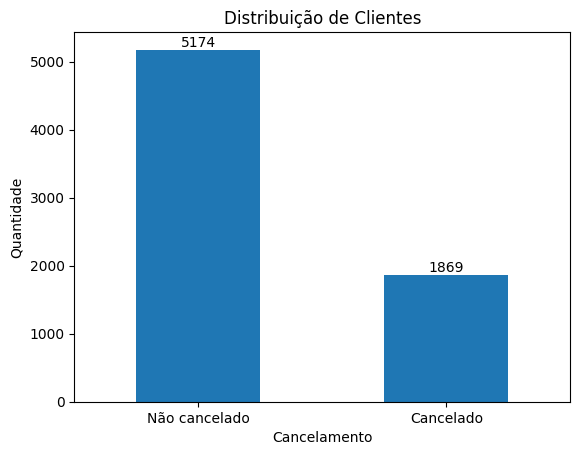

In [18]:
# Gráfico de evasão de clientes
ax = df['cancelamento'].replace({0, 1}, {'Não cancelado', 'Cancelado'}).value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])

plt.title('Distribuição de Clientes')
plt.xlabel('Cancelamento')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.show()

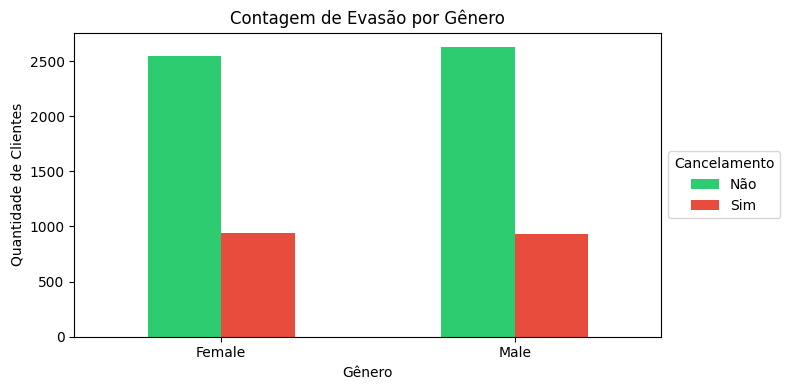

In [19]:
plt.figure(figsize=(8, 4))
grouped = df.groupby(['genero', 'cancelamento']).size().unstack()
grouped.plot(kind='bar', ax=plt.gca(), color=['#2ecc71', '#e74c3c'])

plt.title('Contagem de Evasão por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Cancelamento', labels=['Não', 'Sim'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

A análise por gênero mostrou que a evasão ocorre de forma relativamente equilibrada entre homens e mulheres, indicando que o gênero, isoladamente, não é um fator determinante para o cancelamento.

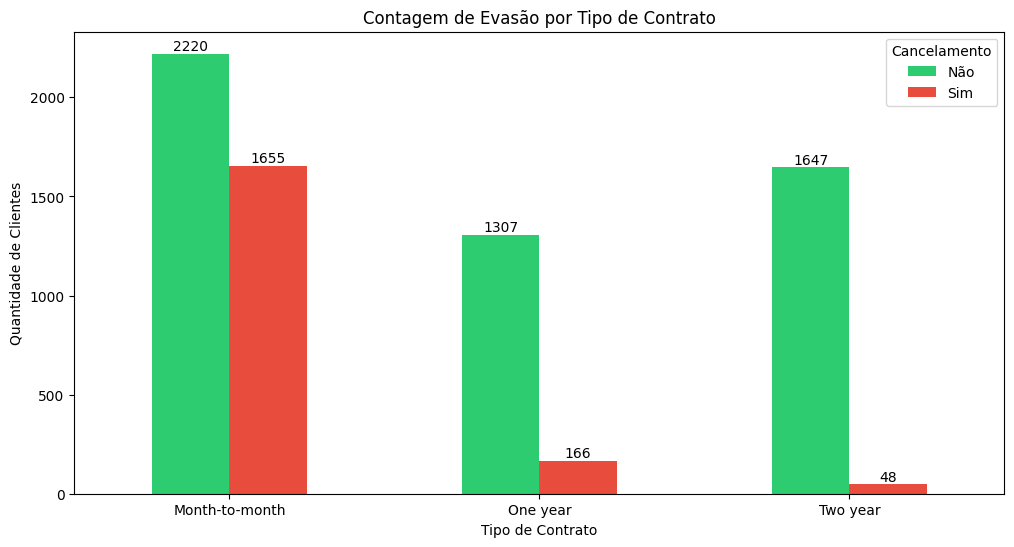

In [20]:
# Gráfico de evasão por tipo de contrato
grouped = df.groupby(['tipo_contrato', 'cancelamento']).size().unstack()
ax = grouped.plot(kind='bar', color=['#2ecc71', '#e74c3c'])

ax.figure.set_size_inches(12, 6)

for container in ax.containers:
    ax.bar_label(container)

plt.title('Contagem de Evasão por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=0)
plt.legend(title='Cancelamento', labels=['Não', 'Sim'])
plt.show()

Clientes com contrato mensal apresentaram maior taxa de evasão quando comparados aos contratos anuais ou bienais, indicando menor fidelização.

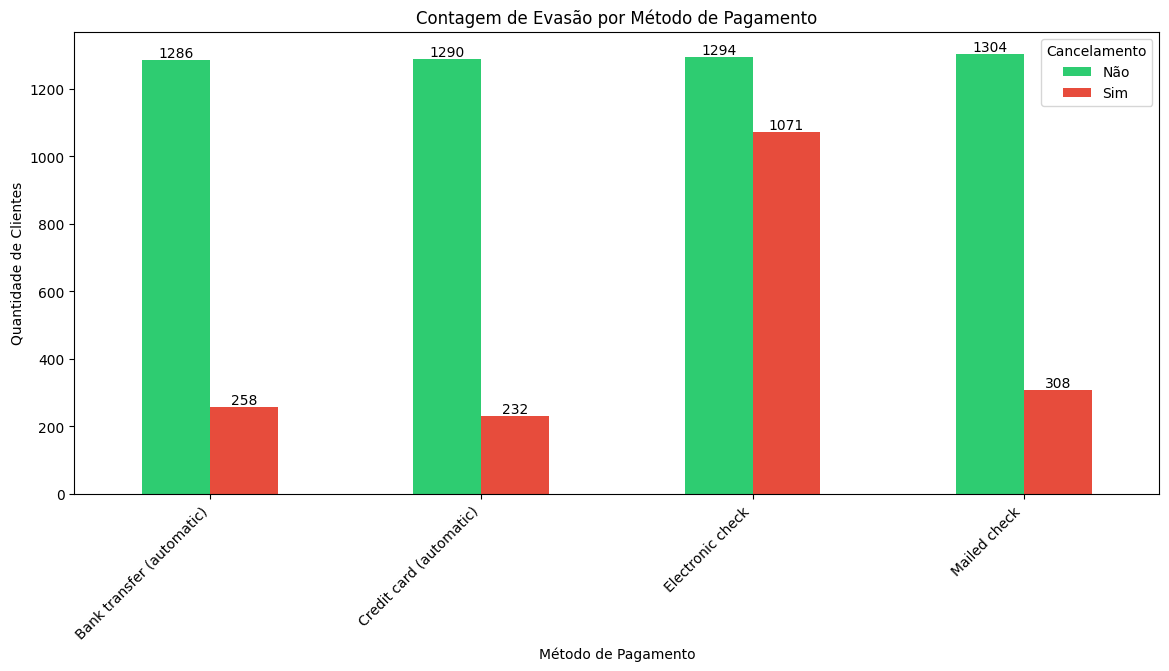

In [21]:
# Gráfico de evasão por método de pagamento
grouped = df.groupby(['metodo_pagamento', 'cancelamento']).size().unstack()
ax = grouped.plot(kind='bar', color=['#2ecc71', '#e74c3c'])

for container in ax.containers:
    ax.bar_label(container)

ax.figure.set_size_inches(14, 6)

plt.title('Contagem de Evasão por Método de Pagamento')
plt.xlabel('Método de Pagamento')
plt.ylabel('Quantidade de Clientes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancelamento', labels=['Não', 'Sim'])
plt.show()

Clientes que utilizam cheque eletrônico (Electronic check) apresentaram maior taxa de evasão quando comparados aos métodos automáticos, como cartão de crédito e transferência bancária, sugerindo que a automatização do pagamento pode contribuir para a redução do churn.

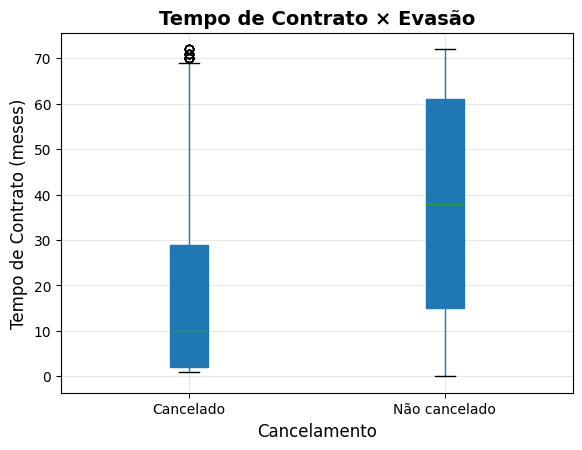

In [22]:
# Gráfico de tempo de contrato × evasão
df_temp = df.copy()
df_temp['cancelamento'] = df_temp['cancelamento'].replace({0: 'Não cancelado', 1: 'Cancelado'})

ax = df_temp.boxplot(column='tempo_contrato_meses', by='cancelamento', patch_artist=True)

plt.title('Tempo de Contrato × Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Cancelamento', fontsize=12)
plt.ylabel('Tempo de Contrato (meses)', fontsize=12)
plt.suptitle('')  # Remove título automático
plt.grid(True, alpha=0.3)
plt.show()

O boxplot mostrou que clientes que cancelaram tendem a ter menor tempo de contrato, indicando que a evasão ocorre com maior frequência nos primeiros meses de relacionamento com a empresa.

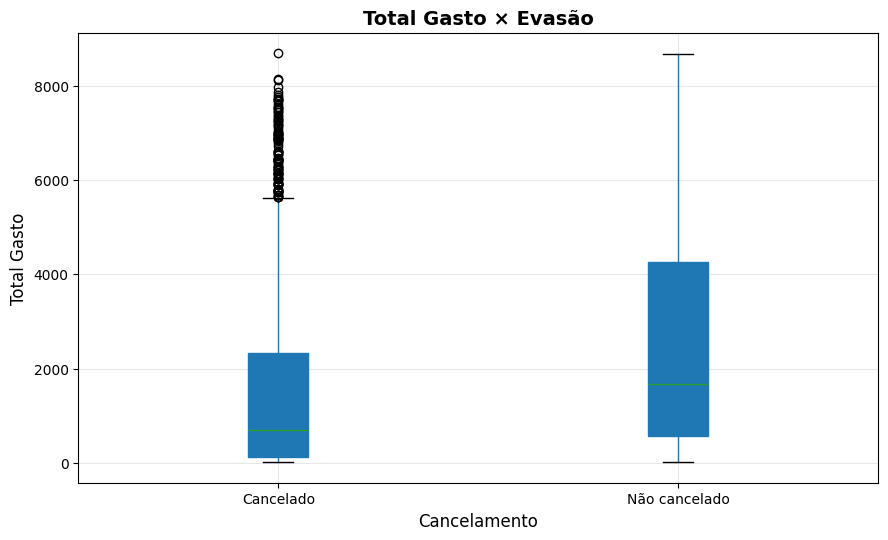

In [23]:
# Gráfico de total gasto × evasão
df_temp = df.copy()
df_temp['cancelamento'] = df_temp['cancelamento'].replace({0: 'Não cancelado', 1: 'Cancelado'})

ax = df_temp.boxplot(column='total_cobrado', by='cancelamento', patch_artist=True)

ax.figure.set_size_inches(10, 6)

plt.title('Total Gasto × Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Cancelamento', fontsize=12)
plt.ylabel('Total Gasto', fontsize=12)
plt.suptitle('')  # Remove título automático
plt.grid(True, alpha=0.3)
plt.show()

Observou-se que clientes que permanecem ativos possuem um total gasto significativamente maior, o que é esperado, já que permanecem por mais tempo na base.

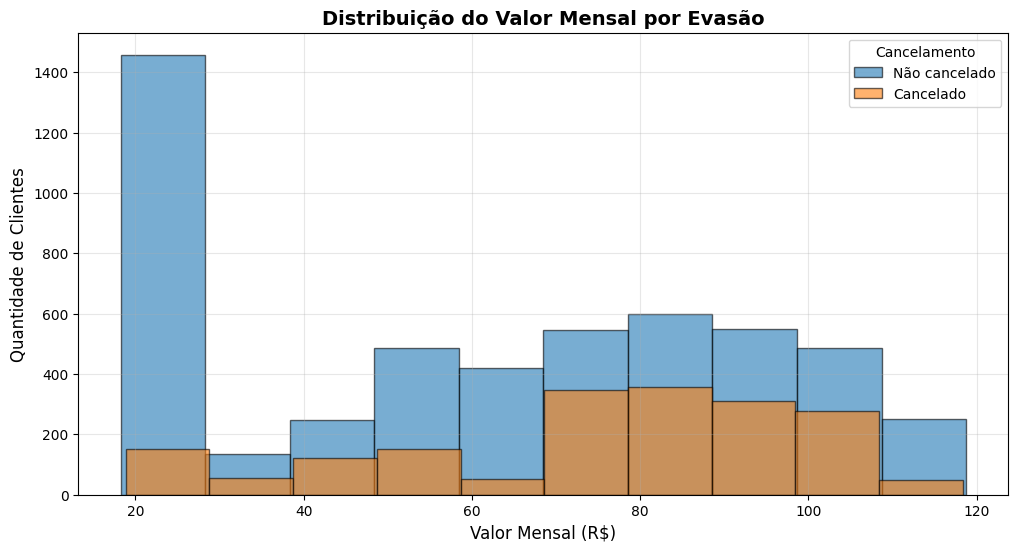

In [24]:
# Gráfico de distribuição do valor mensal por evasão
fig, ax = plt.subplots(figsize=(12, 6))

for cancelamento in df['cancelamento'].unique():
    df[df['cancelamento'] == cancelamento]['valor_mensal'].hist(
        bins=10, 
        alpha=0.6, 
        label=f"{'Não cancelado' if cancelamento == 0 else 'Cancelado'}",
        edgecolor='black',
        ax=ax
    )

plt.title('Distribuição do Valor Mensal por Evasão', fontsize=14, fontweight='bold')
plt.xlabel('Valor Mensal (R$)', fontsize=12)
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.legend(title='Cancelamento')
plt.grid(True, alpha=0.3)
plt.show()

A distribuição do valor mensal revelou que clientes com valores mensais mais elevados apresentam maior propensão ao cancelamento, sugerindo sensibilidade ao preço.


📄Relatorio Final

Introdução.

A competitividade no setor de telecomunicação torna a retenção de clientes um fator estratégico para a sustentabilidade das empresas. A envasão de clientes, conhecida como churn, impacta diretamente a receita e os custos operacionais, uma vez que a aquisição de novos clientes tende a ser mais onerosa do que a manutenção dos atuais. Dessa forma, compreender os fatores que levam ao cancelamento dos serviços é essencial para o desenvolvimento de estratégias eficazes de fidelização.

Neste contexto, o presente relatório tem como objetivo analisar os dados de clientes da empresa Telecom X, utilizando técnicas de análise exploratória de dados, a fim de identificar padrões e variáveis associadas ao churn. A partir do tratamento e da visualização dos dados, busca-se compreender o perfil dos clientes com maior propensão à evasão e gerar insights que possam subsidiar a tomada de decisões estratégicas pela empresa, contribuindo para a redução do churn e a melhoria da experiência do cliente.

Limpeza e Tratamento de Dados

Inicialmente, os dados foram importados para o ambiente do Google Colab e passaram por um processo de limpeza e tratamento, incluindo:

    Verificação e tratamento de valores ausentes;
    Conversão de variáveis categóricas em formatos adequados para análise;
    Padronização de colunas como cancelamento, transformando valores como “Sim” e “Não” em representações numéricas (1 e 0);
    Criação da variável contas_diarias, derivada a partir do valor mensal, para enriquecer a análise;
    Verificação de tipos de dados e consistência das informações.

Esses passos garantiram maior confiabilidade e qualidade para as análises realizadas.

Análise Exploratória de Dados (EDA).

Durante a análise exploratória, foram utilizadas visualizações gráficas para identificar padrões e relações entre as variáveis e a evasão de clientes.

    Tempo de Contrato × Evasão: O boxplot mostrou que clientes que cancelaram tendem a ter menor tempo de contrato, indicando que a evasão ocorre com maior frequência nos primeiros meses de relacionamento com a empresa.

    Valor Mensal × Evasão: A distribuição do valor mensal revelou que clientes com valores mensais mais elevados apresentam maior propensão ao cancelamento, sugerindo sensibilidade ao preço.

    Total Gasto × Evasão: Observou-se que clientes que permanecem ativos possuem um total gasto significativamente maior, o que é esperado, já que permanecem por mais tempo na base.

    Tipo de Contrato × Evasão: Clientes com contrato mensal apresentaram maior taxa de evasão quando comparados aos contratos anuais ou bienais, indicando menor fidelização.

    Método de Pagamento × Evasão: Clientes que utilizam cheque eletrônico (Electronic check) apresentaram maior taxa de evasão quando comparados aos métodos automáticos, como cartão de crédito e transferência bancária, sugerindo que a automatização do pagamento pode contribuir para a redução do churn.

    Gênero × Evasão: A análise por gênero mostrou que a evasão ocorre de forma relativamente equilibrada entre homens e mulheres, indicando que o gênero, isoladamente, não é um fator determinante para o cancelamento.

    Análise de Correlação: A matriz de correlação indicou correlação positiva moderada entre valor_mensal, contas_diarias e total_cobrado;

Correlação negativa entre total_cobrado e cancelamento, reforçando que clientes mais antigos e engajados cancelam menos.

Conclusões e Insights.

A análise permitiu identificar alguns fatores-chave associados à evasão de clientes:

    Clientes com pouco tempo de contrato são mais propensos ao churn;

    Valores mensais elevados aumentam a chance de cancelamento;

    Contratos mensais apresentam maior taxa de evasão;

    A ausência de serviços adicionais está relacionada a maior churn;

    Clientes mais engajados e com maior gasto acumulado tendem a permanecer na base.

    A análise por gênero indicou que a evasão ocorre de forma equilibrada, sugerindo que fatores demográficos não são determinantes isoladamente;

    O método de pagamento mostrou forte relação com o churn, com maior evasão entre clientes que utilizam cheque eletrônico, enquanto métodos automáticos apresentam maior retenção.

Recomendação Estratégicas

    Incetivar contratos de longos prazos, oferecendo beneficios e descontos.

    Desenvolver ações de retenção nos primeiros meses de contrato

    Revisar valores dos planos mensais, buscando maior competitividade

    Melhorar a experiência do cliente, especialmente nos processos de cobrança e atendimento

